# FIFA World Rankings Analysis with Python and R
## Part 1 - Data Acquisition and Preparation
- Using Python's Selenium package to perform web scraping
___

#### Import necessary dependencies

In [1]:
from bs4 import BeautifulSoup
import urllib
import re
import time
import pandas as pd
import json
from datetime import datetime, date, timedelta
import numpy as np
import pandas as pd
from datetime import datetime as dt
from selenium import webdriver
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import ElementClickInterceptedException
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.action_chains import ActionChains
import validators

pd.options.display.max_rows = 5000

home_page = 'https://www.fifa.com/fifa-world-ranking/ranking-table/men/'

# Set wait times
waittime = 0.5

# Initiate web driver
try:
    driver.close() # Close any existing WebDrivers
except Exception:
    pass

# Set webdriver options
options = webdriver.ChromeOptions()
options.add_argument('--no-sandbox')
options.add_argument('ignore-certificate-errors')

# Initiate webdriver
driver = webdriver.Chrome(options=options) 

___
#### Setup web driver

In [2]:
# Get driver to retrieve homepage
driver.get(home_page)

# Wait for page to load
driver.implicitly_wait(waittime)

# Handle cookies acceptance if any
try:
    driver.find_element_by_xpath('//*[@id="onetrust-accept-btn-handler"]').click()
except:
    pass

___
#### Get list of ranking dates and corresponding URLs

In [3]:
# Get list of dates where rankings are available
date_elems = driver.find_elements_by_xpath("//li[@class='fi-ranking-schedule__nav__item']/a")

# Create empty date list to store all dates with rankings
date_list = []

for elem in date_elems:
    date_dict = {}
    date = elem.get_attribute("text")
    url = elem.get_attribute("href")
    date_dict.update({'date': date, 'url': url}) 
    date_list.append(date_dict)

date_df = pd.DataFrame(date_list) 
date_df

,date,url
0,27 May 2021,https://www.fifa.com/fifa-world-ranking/rankin...
1,07 April 2021,https://www.fifa.com/fifa-world-ranking/rankin...
2,18 February 2021,https://www.fifa.com/fifa-world-ranking/rankin...
3,10 December 2020,https://www.fifa.com/fifa-world-ranking/rankin...
4,26 November 2020,https://www.fifa.com/fifa-world-ranking/rankin...
5,22 October 2020,https://www.fifa.com/fifa-world-ranking/rankin...
6,17 September 2020,https://www.fifa.com/fifa-world-ranking/rankin...
7,16 July 2020,https://www.fifa.com/fifa-world-ranking/rankin...
8,11 June 2020,https://www.fifa.com/fifa-world-ranking/rankin...
9,09 April 2020,https://www.fifa.com/fifa-world-ranking/rankin...


#### Define utility functions

In [4]:
# Get pagination pages of each date page
def get_pagination_pages():
    pagination_elems = driver.find_elements_by_xpath("//ul[@class='pagination']/li/a") 
    pagination_list = []

    for elem in pagination_elems:
        page_num = elem.get_attribute("text")
        pagination_list.append(page_num)

    return pagination_list

In [5]:
# Define function to scrape current page
def scrape_current_page(page_num, date):
    df = pd.DataFrame(columns = ['rank', 'country', 'points', 'date'])
    driver.find_element_by_link_text(page_num).click()
    row_elems = driver.find_elements_by_xpath("//tbody/tr")

    for elem in row_elems:
        rank = elem.text.split('\n')[0]
        country = elem.text.split('\n')[1]
        points = elem.text.split('\n')[2].split(' ')[0]
        df = df.append({'rank':rank, 'country':country, 'points':points, 'date':date}, ignore_index=True)
    
    return df

___
#### Perform iterative web scraping on every page

In [6]:
# Get list of dates where rankings are available
date_elems = driver.find_elements_by_xpath("//li[@class='fi-ranking-schedule__nav__item']/a")

date_list = []

for elem in date_elems:
    date_dict = {}
    date = elem.get_attribute("text")
    url = elem.get_attribute("href")
    date_dict.update({'date': date, 'url': url}) 
    date_list.append(date_dict)

date_df = pd.DataFrame(date_list) 
date_df

,date,url
0,27 May 2021,https://www.fifa.com/fifa-world-ranking/rankin...
1,07 April 2021,https://www.fifa.com/fifa-world-ranking/rankin...
2,18 February 2021,https://www.fifa.com/fifa-world-ranking/rankin...
3,10 December 2020,https://www.fifa.com/fifa-world-ranking/rankin...
4,26 November 2020,https://www.fifa.com/fifa-world-ranking/rankin...
5,22 October 2020,https://www.fifa.com/fifa-world-ranking/rankin...
6,17 September 2020,https://www.fifa.com/fifa-world-ranking/rankin...
7,16 July 2020,https://www.fifa.com/fifa-world-ranking/rankin...
8,11 June 2020,https://www.fifa.com/fifa-world-ranking/rankin...
9,09 April 2020,https://www.fifa.com/fifa-world-ranking/rankin...


In [7]:
# Define master dataframe to store all the rankings
master_df = pd.DataFrame(columns = ['rank', 'country', 'points', 'date'])

for index, row in date_df.iterrows():
    date = row['date']
    url = row['url']
    
    driver.get(url)
    driver.implicitly_wait(waittime)
    
    # Handle cookies acceptance if any
    try:
        driver.find_element_by_xpath('//*[@id="onetrust-accept-btn-handler"]').click()
    except:
        pass
    
    # Wait for pagination load
    element_present = EC.presence_of_element_located((By.ID, 'rank-table_paginate'))
    WebDriverWait(driver, waittime).until(element_present)
        
    # Scrape for every pagination page
    list_of_pages = get_pagination_pages()
    for page_num in list_of_pages:
        df_i = scrape_current_page(page_num, date)
        master_df = pd.concat([master_df, df_i])
        
master_df.reset_index(drop=True, inplace=True)

___
#### View output

In [10]:
len(master_df)

63064

In [59]:
master_df.head(20)

,rank,country,points,date
0,1,Belgium,1783.38,27 May 2021
1,2,France,1757.30,27 May 2021
2,3,Brazil,1742.65,27 May 2021
3,4,England,1686.78,27 May 2021
4,5,Portugal,1666.12,27 May 2021
5,6,Spain,1648.13,27 May 2021
6,7,Italy,1642.06,27 May 2021
7,8,Argentina,1641.95,27 May 2021
8,9,Uruguay,1639.08,27 May 2021
9,10,Denmark,1631.55,27 May 2021


#### Export data

In [58]:
# master_df.to_csv('FIFA_World_Rankings_Raw_20210610.csv', index=False)
# master_df = pd.read_csv('FIFA_World_Rankings_Raw_20210610.csv')

___
## Collate National Data

### Get country flag images
Source: https://data.world/pbi/country-flag-database-from-wikipedia

In [8]:
country_flags = pd.read_excel('./data/country_flags_dataset.xlsx')
country_flags.head()

<IPython.core.display.Javascript object>

,Country,ImageURL
0,Afghanistan,https://upload.wikimedia.org/wikipedia/commons...
1,Albania,https://upload.wikimedia.org/wikipedia/commons...
2,Algeria,https://upload.wikimedia.org/wikipedia/commons...
3,Andorra,https://upload.wikimedia.org/wikipedia/commons...
4,Angola,https://upload.wikimedia.org/wikipedia/commons...


In [9]:
# Import master dataframe
master_df = pd.read_csv('./data/FIFA_World_Rankings_Raw_20210610.csv')

# Rename countries of master dataframe
master_df.replace('USA', 'United States', inplace=True)
master_df.replace('Korea Republic', 'South Korea', inplace=True)
master_df.replace('Korea DPR', 'North Korea', inplace=True)
master_df.replace("Côte d'Ivoire", 'Ivory Coast', inplace=True)
master_df.replace('Congo DR', 'Democratic Republic of Congo', inplace=True)
master_df.replace('Congo', 'Republic of Congo', inplace=True)
master_df.replace('China PR', 'China', inplace=True)
master_df.replace('IR Iran', 'Iran', inplace=True)

<IPython.core.display.Javascript object>

In [10]:
# Merge country flag URL with master dataframe
master_df_flag = master_df.merge(country_flags, how = 'left', left_on='country', right_on='Country')

# Drop extra Country column
master_df_flag.drop(columns=['Country'], inplace=True)

# List of countries without flag image
master_df_flag[master_df_flag['ImageURL'].isnull()]['country'].unique()

array(['North Macedonia', 'Cabo Verde', 'Curaçao', 'Kyrgyz Republic',
       'Faroe Islands', 'St. Kitts and Nevis', 'Eswatini',
       'New Caledonia', 'Tahiti', 'St. Vincent and the Grenadines',
       'Bermuda', 'St. Lucia', 'Puerto Rico', 'Montserrat',
       'São Tomé and Príncipe', 'American Samoa', 'Cayman Islands',
       'Gibraltar', 'Timor-Leste', 'Guam', 'Aruba',
       'Turks and Caicos Islands', 'US Virgin Islands',
       'British Virgin Islands', 'Anguilla', 'Curacao',
       'Sao Tome e Principe', 'FYR Macedonia', 'St. Vincent / Grenadines',
       'São Tomé e Príncipe', 'Netherlands Antilles',
       'Serbia and Montenegro', 'Yugoslavia', 'Zaire', 'Czechoslovakia'],
      dtype=object)

In [11]:
master_df_flag.head()

,rank,country,points,date,ImageURL
0,1,Belgium,1783.38,27 May 2021,https://upload.wikimedia.org/wikipedia/commons...
1,2,France,1757.30,27 May 2021,https://upload.wikimedia.org/wikipedia/en/c/c3...
2,3,Brazil,1742.65,27 May 2021,https://upload.wikimedia.org/wikipedia/en/0/05...
3,4,England,1686.78,27 May 2021,https://upload.wikimedia.org/wikipedia/commons...
4,5,Portugal,1666.12,27 May 2021,https://upload.wikimedia.org/wikipedia/commons...


___
### Get country population

In [12]:
country_pop = pd.read_excel('./data/country_population_2020.xlsx')
country_pop.head()

<IPython.core.display.Javascript object>

,Country,Population,Yearly Change,Net Change,Density (P/KmÂ²),Land Area (KmÂ²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,China,1440297825,0.0039,5540090.0,153.0,9388211.0,-348399.0,1.7,38,0.61,0.1847
1,India,1382345085,0.0099,13586631.0,464.0,2973190.0,-532687.0,2.2,28,0.35,0.1770
2,United States,331341050,0.0059,1937734.0,36.0,9147420.0,954806.0,1.8,38,0.83,0.0425
3,Indonesia,274021604,0.0107,2898047.0,151.0,1811570.0,-98955.0,2.3,30,0.56,0.0351
4,Pakistan,221612785,0.0200,4327022.0,287.0,770880.0,-233379.0,3.6,23,0.35,0.0283


In [21]:
master_df_flag_pop = master_df_flag.merge(country_pop, how = 'left', left_on='country', right_on='Country')

# Drop extra Country column
master_df_flag_pop.drop(columns=['Country'], inplace=True)

# List of countries without flag image
master_df_flag_pop[master_df_flag_pop['Population'].isnull()]['country'].unique()

array(['Kyrgyz Republic', 'St. Kitts and Nevis', 'Chinese Taipei',
       'Tahiti', 'St. Vincent and the Grenadines', 'St. Lucia', 'Macau',
       'São Tomé and Príncipe', 'Turks and Caicos Islands',
       'US Virgin Islands', 'Curacao', 'Cape Verde Islands',
       'Sao Tome e Principe', 'FYR Macedonia', 'Swaziland',
       'St. Vincent / Grenadines', 'São Tomé e Príncipe',
       'Netherlands Antilles', 'Serbia and Montenegro', 'Yugoslavia',
       'Zaire', 'Czechoslovakia'], dtype=object)

In [22]:
# Create log population
master_df_flag_pop['population_natural_log'] = np.log(master_df_flag_pop['Population'])

# Rename columns
master_df_flag_pop.columns = ['rank', 'country', 'points', 'date', 'image_url', 'population',
                             'yearly_change', 'net_change', 'density', 'land_area', 'net_migrants',
                             'fertility_rate', 'median_age', 'urban_pop_percentage', 'world_share',
                             'population_log']

# Rearrange columns
master_df_flag_pop = master_df_flag_pop[['country', 'rank', 'points', 'date', 'image_url', 'population',
                                         'yearly_change', 'net_change', 'density', 'land_area', 'net_migrants',
                                         'fertility_rate', 'median_age', 'urban_pop_percentage', 'world_share',
                                         'population_log']]

# Export dataset
master_df_flag_pop.to_csv('./data/FIFA_World_Rankings_Processed_20210610.csv', index=False)

master_df_flag_pop.head()

<IPython.core.display.Javascript object>

,country,rank,points,date,image_url,population,yearly_change,net_change,density,land_area,net_migrants,fertility_rate,median_age,urban_pop_percentage,world_share,population_log
0,Belgium,1,1783.38,27 May 2021,https://upload.wikimedia.org/wikipedia/commons...,11598451.0,0.0044,50295.0,383.0,30280.0,48000.0,1.7,42,0.98,0.0015,16.266382
1,France,2,1757.30,27 May 2021,https://upload.wikimedia.org/wikipedia/en/c/c3...,65298930.0,0.0022,143783.0,119.0,547557.0,36527.0,1.9,42,0.82,0.0084,17.994486
2,Brazil,3,1742.65,27 May 2021,https://upload.wikimedia.org/wikipedia/en/0/05...,212821986.0,0.0072,1509890.0,25.0,8358140.0,21200.0,1.7,33,0.88,0.0273,19.175967
3,England,4,1686.78,27 May 2021,https://upload.wikimedia.org/wikipedia/commons...,56286961.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.83,NaN,17.845973
4,Portugal,5,1666.12,27 May 2021,https://upload.wikimedia.org/wikipedia/commons...,10191409.0,-0.0029,-29478.0,111.0,91590.0,-6000.0,1.3,46,0.66,0.0013,16.137056


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='population_natural_log', ylabel='points'>

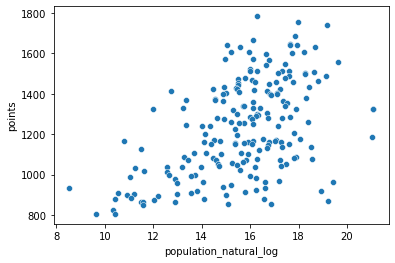

In [15]:
# Explore most recent date data
latest_date = master_df_flag_pop.iloc[0]['date']
master_df_flag_pop_latest = master_df_flag_pop[master_df_flag_pop['date'] == latest_date]
sns.scatterplot(data=master_df_flag_pop_latest, x="population_natural_log", y="points")